# Stock Prediction

# 프로젝트 개요

## 프로젝트 목표
- 기계학습(Machine Learning)

## 문제 정의
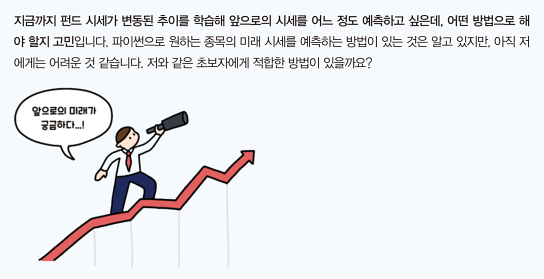

# 기계 학습
- 방대한 데이터를 학습하여 패턴을 인식해 사람이 원하는 동작을 할 수 있도록 프로그래밍 하는 것
- f(x) = y : f()는 함수, x는 변수, y는 결과값

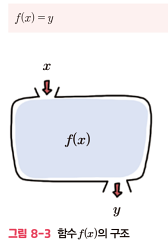


- x, y값을 주고 공식을 구하는 방식
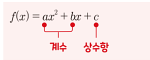

- 기계학습 유형


> 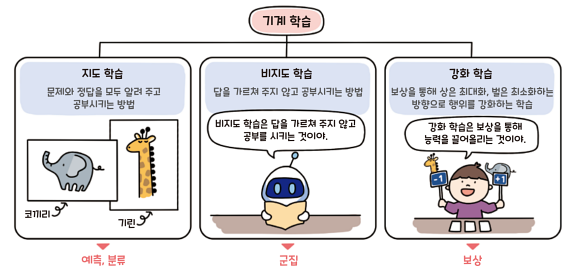




## 오픈소스 기계학습 도구, 프로핏
- 프로핏(Prophet) : 메타(전 페이스북)의 기계 학습 도구
- 자동으로 데이터를 예측할 수 있는 오픈소스 기계 학습 도구
- 누락된 값이나 특잇값을 손쉽게 처리하는 기능 제공
- Prophet : https://facebook.github.io/prophet/


## Prophet 설치
- colab에 이미 설치

# 데이터 수집
- KODEX200 선물인버스2X
- https://finance.naver.com/item/sise_day.naver?code=252670&page=2


In [21]:
# Web Scraping을 하기 위해 주소와 헤더 정보 설정
import pandas as pd
import requests

# 페이지 번호를 제외한 주소 저장
new_url = 'https://finance.naver.com/item/sise_day.naver?code=252670&page='

# 헤더 정보 설정
my_headers = {'user-agent': 'Mozilla/5.0'}

# 데이터를 축척할 데이터프레임 생성
all_tables_year = pd.DataFrame()

In [ ]:

for page_number in range(1, 100):

  # 페이지 번호 추가한 URL 완성
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기 ({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 내용 확인
  print(f'전체 {len(all_tables_year.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축척용 데이터프레임에 테이블 추가
  all_tables_year = pd.concat([all_tables_year, table])


# 데이터 가공

- Quick Start : https://facebook.github.io/prophet/docs/quick_start.html#python-api

- The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [23]:
from prophet import Prophet

# 결손치 제거
all_tables_year.dropna(inplace=True)

# 열 이름 영문으로 변경
all_tables_year.rename(columns={'날짜' : 'ds'}, inplace=True)

# 중위값 열 추가
all_tables_year['y'] = all_tables_year['고가'] - ((all_tables_year['고가'] - all_tables_year['저가'])/2)

all_tables_year

,ds,종가,전일비,시가,고가,저가,거래량,y
1,2023.01.06,3230.0,75.0,3340.0,3350.0,3200.0,160589795.0,3275.0
2,2023.01.05,3305.0,50.0,3320.0,3360.0,3270.0,137094892.0,3315.0
3,2023.01.04,3355.0,145.0,3545.0,3550.0,3335.0,143321427.0,3442.5
4,2023.01.03,3500.0,5.0,3485.0,3640.0,3470.0,178553041.0,3555.0
5,2023.01.02,3495.0,45.0,3435.0,3505.0,3400.0,94248033.0,3452.5
...,...,...,...,...,...,...,...,...
9,2019.01.11,7900.0,100.0,7935.0,8000.0,7865.0,12890304.0,7932.5
10,2019.01.10,8000.0,5.0,7990.0,8055.0,7915.0,14366428.0,7985.0
11,2019.01.09,7995.0,360.0,8285.0,8290.0,7945.0,21883656.0,8117.5
12,2019.01.08,8355.0,115.0,8245.0,8365.0,8190.0,15412503.0,8277.5


In [24]:
# 학습 대상 데이터프레임 생성
df = pd.DataFrame()

# 필요한 열만 추출하여 저장
df = all_tables_year[['ds', 'y']]

# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      990 non-null    object 
 1   y       990 non-null    float64
dtypes: float64(1), object(1)
memory usage: 23.2+ KB


# 데이터 학습 및 시각화

## 데이터 학습
- 앞에서 준비한 데이터 프레임을 fit() 메서드 인수로 사용
- scikit learn의 fit method : 훈련시기키 위한 Method

In [26]:
# Prophet Model 객체 만들기
m = Prophet()

# 데이터 프레임 학습
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wwj7649/ftlntse8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wwj7649/2qkb0x6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81100', 'data', 'file=/tmp/tmp0wwj7649/ftlntse8.json', 'init=/tmp/tmp0wwj7649/2qkb0x6z.json', 'output', 'file=/tmp/tmp0wwj7649/prophet_model_970aevb/prophet_model-20230107062251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 예측 결과 저장용 데이터프레임 준비

- Prophet의 Method : make_futuer_dataframe()

In [27]:
# 예측 데이터프레임 준비
future = m.make_future_dataframe(periods=1000)

# 끝부분 확인
future.tail()

,ds
1985,2025-09-28
1986,2025-09-29
1987,2025-09-30
1988,2025-10-01
1989,2025-10-02


## 1차 예측 및 시각화

- 예측은 Prophet의 predict() method 사용


In [28]:
# 예측하기
forecast = m.predict(future)

# 예측 결과 끝부분 확인
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1985,2025-09-28,6939.951144,-978.480951,14314.436896
1986,2025-09-29,6597.978438,-1389.991387,13864.682288
1987,2025-09-30,6584.295869,-1470.958951,13752.594282
1988,2025-10-01,6592.470328,-1572.348664,13972.699553
1989,2025-10-02,6596.685691,-1591.632931,13870.123663


## 단순 그래프로 시각화


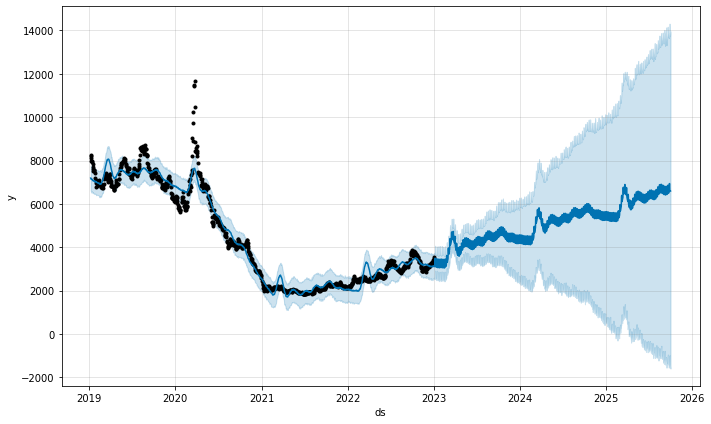

In [29]:
# 예측 결과 시각화
fig1 = m.plot(forecast)

## 예측 components 그래프 확인
- prophet의 components() method를 사용하면 예측 결과에서 추출할 수 있는 여러 컴포넌트를 확인 할 수 있음.

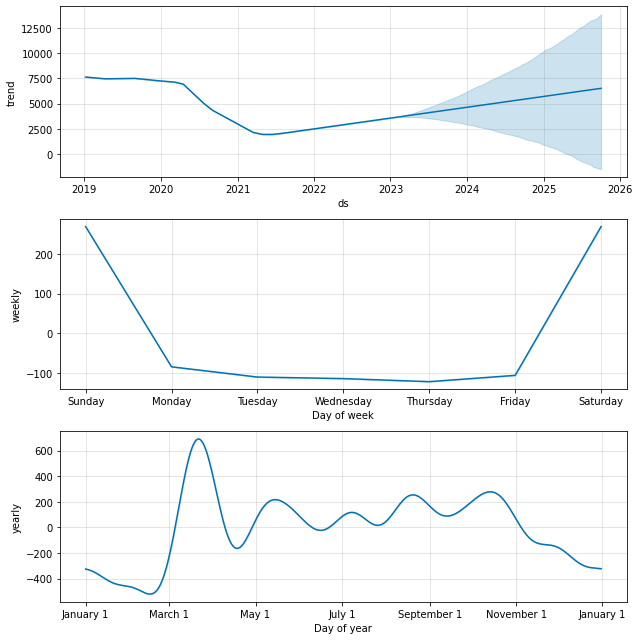

In [30]:
fig2 = m.plot_components(forecast)

## 2차 예측 및 시각화

### 데이터 범위 좁히기
- 2021년 1월 1일 이후 데이터로 범위 좁혀서 예측

In [31]:
# 2차 예측을 위한 Prophet 객체 새성
m2 = Prophet()

# 2021-01-01 이후 데이터만 준비
df2 = df[df['ds']> '2021-01-01']

# 데이터 끝부분
df2.tail()

,ds,y
5,2021.01.08,2110.0
9,2021.01.07,2257.5
10,2021.01.06,2312.5
11,2021.01.05,2370.0
12,2021.01.04,2452.5


### 재 예측

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wwj7649/bnsviq46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wwj7649/5irika7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19219', 'data', 'file=/tmp/tmp0wwj7649/bnsviq46.json', 'init=/tmp/tmp0wwj7649/5irika7b.json', 'output', 'file=/tmp/tmp0wwj7649/prophet_modelhw0ep6dq/prophet_model-20230107065514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


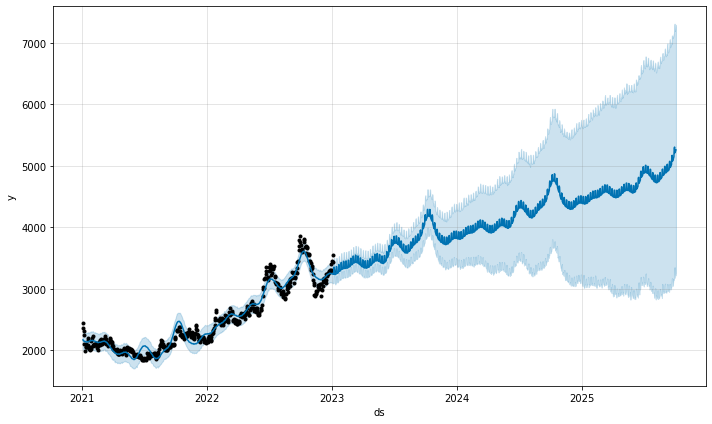

In [33]:
# 데이터 학습하기
m2.fit(df2)

# 예측 데이터프레임 만들기
future2 = m2.make_future_dataframe(periods=1000)

# 예측하기
forecast2 = m2.predict(future2)

# 예측 결과 끝부분
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# 시각화
fig3 = m2.plot(forecast2)

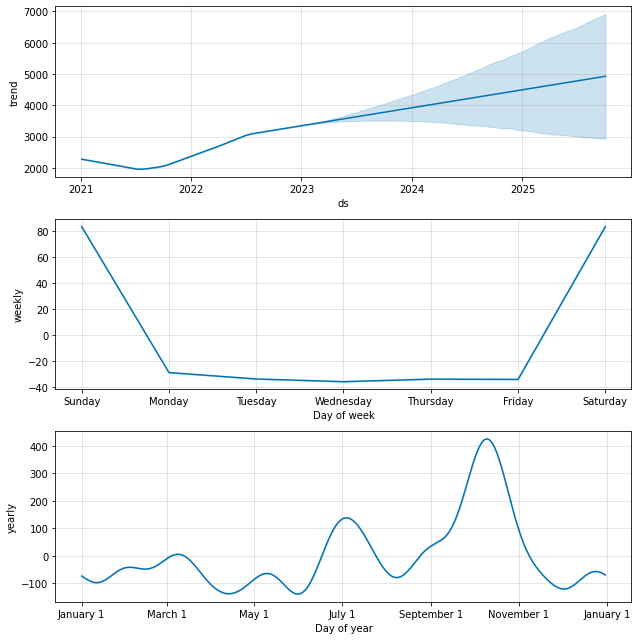

In [34]:
fig4 = m2.plot_components(forecast2)

## 대화형 그래프

- 실시간으로 x 축을 조정할 수 있는 대화형(interactive)그래프 기능 제공
- plotly 모듈 사용
- plotly 모둘은 Prophet 설치시 자동 설치
- Method : plot_plotly()

In [35]:
# plot 모듈 탑재
from prophet.plot import plot_plotly, plot_components_plotly

# 대화형 예측 그래프
plot_plotly(m2, forecast2)

## interactive 예측 components 그래프
- components_plotly()

In [36]:
plot_components_plotly(m, forecast)